In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from energy_analysis import LineChart

In [2]:
dir_path = Path("../data")
file_name = "energybalance_240413.csv"

file_path = dir_path / file_name

In [3]:
df = pd.read_csv(
    file_path,
    sep=";",
    thousands=",",
    na_values=[" ", ""],
    keep_default_na=True
)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0                                              96 non-null     str    
 1   Direct consumption / Mean values [W]       96 non-null     int64  
 2   Battery discharging / Mean values [W]      0 non-null      float64
 3   External energy supply / Mean values [W]   96 non-null     int64  
 4   Total consumption / Mean values [W]        92 non-null     float64
 5   Grid feed-in / Mean values [W]             96 non-null     int64  
 6   Direct consumption / Mean values [W]       96 non-null     int64  
 7   Battery charging / Mean values [W]         0 non-null      float64
 8   PV power generation / Mean values [W]      96 non-null     int64  
dtypes: float64(3), int64(5), str(1)
memory usage: 6.9 KB


In [5]:
columns = {
    "time": 0,
    "direct consumption": 1,
    "battery discharging": 2,
    "grid import": 3,
    "total consumption": 4,
    "grid export": 5,
    "direct consumption (bis)": 6,
    "battery charging": 7,
    "PV-power": 8
}

In [6]:
time_index = np.asarray([k for k in range(df.shape[0])])
time_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [7]:
pv_power = df.iloc[:, columns["PV-power"]].to_numpy()
pv_power

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   52,  147,  157,  285,
        110,  407,  543,  808, 1059, 1369, 1567, 1712, 1868, 1889, 2235,
       2532, 2616, 2708, 3012, 3065, 3123, 3173, 3335, 3647, 3678, 3579,
       3496, 3658, 3677, 3814, 3586, 3428, 3516, 3419, 3030, 3036, 2972,
       2888, 2667, 2382, 2047, 2145, 1574, 1497, 1082, 1103, 1046,  859,
        576,  435,  283,  166,   66,    6,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [8]:
dir_consumption = df.iloc[:, columns["direct consumption"]].to_numpy()
dir_consumption

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   50,  146,  155,  283,
        108,  405,  541,  781, 1050, 1364, 1562,  916,  408,  344,  344,
        323,  368,  380,  390,  545, 1698, 1168, 1053, 1350, 1655, 2369,
       2871, 1933, 3677, 3814, 3586, 3428, 3516, 3419, 3030, 3036, 2972,
       2888, 2594, 1666,  872,  657,  794,  455,  411,  373,  746,  565,
        415,  373,  283,  166,   66,    6,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [9]:
surplus = pv_power - dir_consumption
surplus

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    2,    1,    2,    2,
          2,    2,    2,   27,    9,    5,    5,  796, 1460, 1545, 1891,
       2209, 2248, 2328, 2622, 2520, 1425, 2005, 2282, 2297, 2023, 1210,
        625, 1725,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   73,  716, 1175, 1488,  780, 1042,  671,  730,  300,  294,
        161,   62,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [10]:
battery_charging = df.iloc[:, columns["battery charging"]].to_numpy()
battery_charging

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

In [11]:
grid_export = df.iloc[:, columns["grid export"]].to_numpy()
grid_export

array([   1,    1,    1,    1,    2,    1,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    2,    1,    1,
          1,    1,    1,    1,    2,    1,    1,    2,    1,    2,    2,
          2,    2,    2,   27,    9,    5,    5,  796, 1460, 1545, 1891,
       2209, 2248, 2328, 2622, 2520, 1425, 2005, 2282, 2297, 2023, 1210,
        625, 1725,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,   73,  716, 1175, 1488,  780, 1042,  671,  730,  300,  294,
        161,   62,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [12]:
battery_discharging = df.iloc[:, columns["battery discharging"]].to_numpy()
battery_discharging

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan])

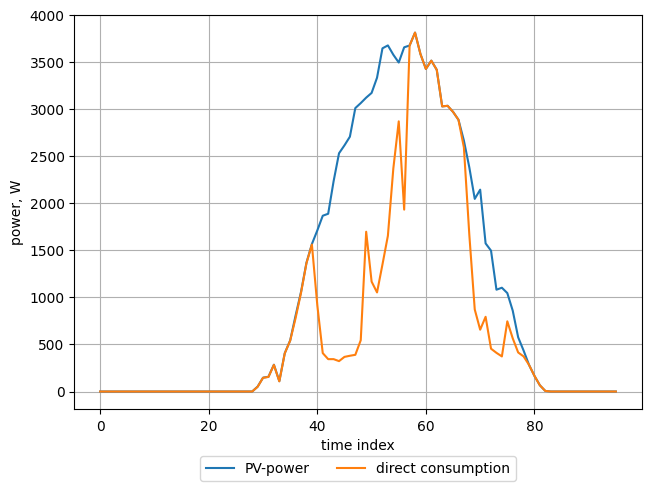

In [13]:
ch = LineChart()
ch.add_xy_data(
    label="PV-power",
    x1_values=time_index,
    y1_values=pv_power
)
ch.add_xy_data(
    label="direct consumption",
    x1_values=time_index,
    y1_values=dir_consumption
)
ch.x1.add_title("time index")
ch.y1.add_title("power, W")
ch.add_legend()
ch.show()

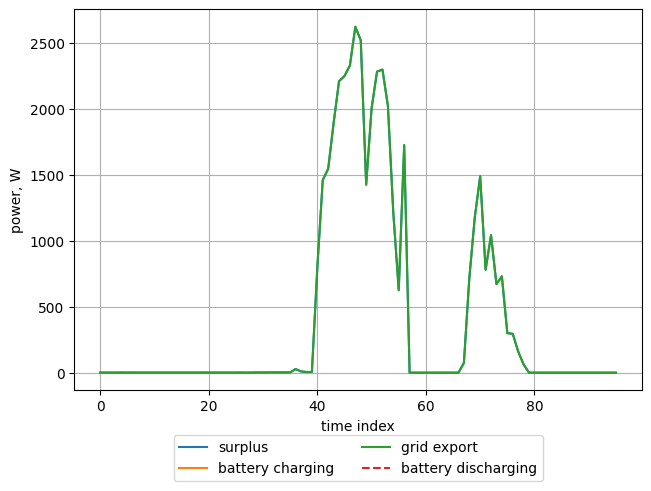

In [14]:
ch = LineChart()
ch.add_xy_data(
    label="surplus",
    x1_values=time_index,
    y1_values=surplus
)
ch.add_xy_data(
    label="battery charging",
    x1_values=time_index,
    y1_values=battery_charging
)
ch.add_xy_data(
    label="grid export",
    x1_values=time_index,
    y1_values=grid_export
)
ch.add_xy_data(
    label="battery discharging",
    x1_values=time_index,
    y1_values=battery_discharging,
    style_props={"linestyle": "--"}
)
ch.x1.add_title("time index")
ch.y1.add_title("power, W")
ch.add_legend()
ch.show()